In [32]:
import pandas
import seaborn

In [33]:
phnumo=pandas.read_csv("capo_data.csv")

In [34]:
phnumo

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,1,1,1,1
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,21706,27.0,1.0,NaN,NaN,166.0,64.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8226,21707,36.0,0.0,0.0,NaN,153.0,72.0,134.0,30.0,126.0,...,0,0,0,0,0,0,0,0,0,0
8227,21708,59.0,1.0,NaN,NaN,170.0,70.0,77.0,18.0,130.0,...,0,0,0,0,0,0,0,0,0,0
8228,21709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


The first 4550 rows or so seem to be incredibly sparce in terms of data. To avoid this missing data hurting the acccuracy of the model, its best to start by dropping these cases.

In [35]:
phnumo=phnumo.drop(range(0,4550))

In [36]:
phnumo.columns.values.tolist()

['case_id',
 'dem_age',
 'dem_sex',
 'dem_pregnant',
 'dem_trimester',
 'exam_height',
 'exam_weight',
 'exam_hr',
 'exam_rr',
 'exam_sbp',
 'exam_dbp',
 'exam_temp',
 'exam_o2sat',
 'exam_o2satvalue',
 'exam_fio2',
 'exam_mental',
 'lab_hematocrit',
 'lab_hemoglobin',
 'lab_wbc',
 'lab_bands',
 'lab_platelets',
 'lab_inr',
 'lab_na',
 'lab_k',
 'lab_bun',
 'lab_creatinine',
 'lab_bicarb',
 'lab_glucose',
 'lab_albumin',
 'lab_ast',
 'lab_alt',
 'lab_bilirubin',
 'lab_trop1',
 'lab_trop2',
 'lab_trop3',
 'lab_ckmb1',
 'lab_ckmb2',
 'lab_ckmb3',
 'lab_ldl',
 'lab_hdl',
 'lab_cholesterol',
 'lab_triglycerides',
 'lab_lactate',
 'lab_hga1c',
 'lab_ldh',
 'lab_bnp',
 'lab_crp',
 'lab_pct',
 'lab_vitamind',
 'lab_abg',
 'lab_abgph',
 'lab_abgpaco2',
 'lab_abgpao2',
 'lab_abgbicarb',
 'lab_abgfio2',
 'cx_rul',
 'cx_rml',
 'cx_rll',
 'cx_lul',
 'cx_lll',
 'cx_db',
 'cx_du',
 'cx_cav',
 'cx_pe',
 'day0test___cough',
 'day0test___afebrile',
 'day0test___wbc',
 'day0test___oral',
 'day1test___co

In [37]:
phnumo.drop(['case_id'],axis=1,inplace=True)

The first step is to drop any non demographic, exam or x-ray data. In terms of the lab data, we will utilize it later in part 5. The Test data will also need to be reduced to a column telling the day which the patient was released. Because of this, it is best to separate the columns innto three datasets, then clean them individually.

In [38]:
phnumo_data=phnumo
phnumo_test_data=phnumo
phnumo_lab=phnumo
phnumo_data=phnumo_data.drop(['lab_hematocrit','lab_hemoglobin','lab_wbc','lab_bands','lab_platelets','lab_inr','lab_na','lab_k','lab_bun','lab_creatinine','lab_bicarb','lab_glucose','lab_albumin','lab_ast','lab_alt','lab_bilirubin','lab_trop1','lab_trop2','lab_trop3','lab_ckmb1','lab_ckmb2','lab_ckmb3','lab_ldl','lab_hdl','lab_cholesterol','lab_triglycerides','lab_lactate','lab_hga1c','lab_ldh','lab_bnp','lab_crp','lab_pct','lab_vitamind','lab_abg','lab_abgph','lab_abgpaco2','lab_abgpao2','lab_abgbicarb','lab_abgfio2','day0test___cough','day0test___afebrile','day0test___wbc','day0test___oral','day1test___cough','day1test___afebrile','day1test___wbc','day1test___oral','day2test___cough','day2test___afebrile','day2test___wbc','day2test___oral','day3test___cough','day3test___afebrile','day3test___wbc','day3test___oral','day4test___cough','day4test___afebrile','day4test___wbc','day4test___oral','day5test___cough','day5test___afebrile','day5test___wbc','day5test___oral','day6test___cough','day6test___afebrile','day6test___wbc','day6test___oral','day7test___cough','day7test___afebrile','day7test___wbc','day7test___oral','over7daytest___cough','over7daytest___afebrile','over7daytest___wbc','over7daytest___oral'],axis=1,inplace=False)
phnumo_test_data=phnumo_test_data.drop(['dem_age','dem_sex','dem_pregnant','dem_trimester','exam_height','exam_weight','exam_hr','exam_rr','exam_sbp','exam_dbp','exam_temp','exam_o2sat','exam_o2satvalue','exam_fio2','exam_mental','lab_hematocrit','lab_hemoglobin','lab_wbc','lab_bands','lab_platelets','lab_inr','lab_na','lab_k','lab_bun','lab_creatinine','lab_bicarb','lab_glucose','lab_albumin','lab_ast','lab_alt','lab_bilirubin','lab_trop1','lab_trop2','lab_trop3','lab_ckmb1','lab_ckmb2','lab_ckmb3','lab_ldl','lab_hdl','lab_cholesterol','lab_triglycerides','lab_lactate','lab_hga1c','lab_ldh','lab_bnp','lab_crp','lab_pct','lab_vitamind','lab_abg','lab_abgph','lab_abgpaco2','lab_abgpao2','lab_abgbicarb','lab_abgfio2','cx_rul','cx_rml','cx_rll','cx_lul','cx_lll','cx_db','cx_du','cx_cav','cx_pe'],axis=1,inplace=False)
phnumo_lab=phnumo_lab.drop(['dem_age','dem_sex','dem_pregnant','dem_trimester','exam_height','exam_weight','exam_hr','exam_rr','exam_sbp','exam_dbp','exam_temp','exam_o2sat','exam_o2satvalue','exam_fio2','exam_mental','cx_rul','cx_rml','cx_rll','cx_lul','cx_lll','cx_db','cx_du','cx_cav','cx_pe','day0test___cough','day0test___afebrile','day0test___wbc','day0test___oral','day1test___cough','day1test___afebrile','day1test___wbc','day1test___oral','day2test___cough','day2test___afebrile','day2test___wbc','day2test___oral','day3test___cough','day3test___afebrile','day3test___wbc','day3test___oral','day4test___cough','day4test___afebrile','day4test___wbc','day4test___oral','day5test___cough','day5test___afebrile','day5test___wbc','day5test___oral','day6test___cough','day6test___afebrile','day6test___wbc','day6test___oral','day7test___cough','day7test___afebrile','day7test___wbc','day7test___oral','over7daytest___cough','over7daytest___afebrile','over7daytest___wbc','over7daytest___oral'],axis=1,inplace=False)


In [39]:
phnumo

,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,...,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
4550,59.0,1.0,NaN,NaN,193.0,100.0,102.0,20.0,142.0,82.0,...,0,0,0,0,0,0,0,0,0,0
4551,61.0,1.0,NaN,NaN,168.0,43.0,90.0,36.0,118.0,74.0,...,0,0,0,0,0,0,0,0,0,0
4552,70.0,1.0,NaN,NaN,168.0,83.0,69.0,16.0,117.0,42.0,...,0,0,0,0,0,0,0,0,0,0
4553,75.0,1.0,NaN,NaN,178.0,97.0,73.0,20.0,134.0,34.0,...,0,0,0,0,0,0,0,0,0,0
4554,88.0,1.0,NaN,NaN,175.0,81.0,106.0,22.0,111.0,48.0,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,27.0,1.0,NaN,NaN,166.0,64.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8226,36.0,0.0,0.0,NaN,153.0,72.0,134.0,30.0,126.0,87.0,...,0,0,0,0,0,0,0,0,0,0
8227,59.0,1.0,NaN,NaN,170.0,70.0,77.0,18.0,130.0,90.0,...,0,0,0,0,0,0,0,0,0,0
8228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [40]:
phnumo_data

,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,...,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe
4550,59.0,1.0,NaN,NaN,193.0,100.0,102.0,20.0,142.0,82.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
4551,61.0,1.0,NaN,NaN,168.0,43.0,90.0,36.0,118.0,74.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0
4552,70.0,1.0,NaN,NaN,168.0,83.0,69.0,16.0,117.0,42.0,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0
4553,75.0,1.0,NaN,NaN,178.0,97.0,73.0,20.0,134.0,34.0,...,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0
4554,88.0,1.0,NaN,NaN,175.0,81.0,106.0,22.0,111.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,27.0,1.0,NaN,NaN,166.0,64.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8226,36.0,0.0,0.0,NaN,153.0,72.0,134.0,30.0,126.0,87.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8227,59.0,1.0,NaN,NaN,170.0,70.0,77.0,18.0,130.0,90.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def desc_col(inputs):
    for items in inputs:
        print(items)
        print(phnumo[items].describe())
        print(' ')
desc_col(phnumo_data.columns)

dem_age
count    3673.000000
mean       63.300844
std        19.897672
min        15.000000
25%        48.000000
50%        66.000000
75%        80.000000
max       104.000000
Name: dem_age, dtype: float64
 
dem_sex
count    3676.000000
mean        0.573993
std         0.494562
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dem_sex, dtype: float64
 
dem_pregnant
count    893.000000
mean       0.025756
std        0.158495
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: dem_pregnant, dtype: float64
 
dem_trimester
count    19.000000
mean      2.157895
std       0.764719
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: dem_trimester, dtype: float64
 
exam_height
count    2643.000000
mean      158.564888
std        37.048578
min        15.000000
25%       160.000000
50%       167.000000
75%       174.000000
max       2

Any variable with a null percentage larger than 30% must be droped. The rest can be imputed.

In [42]:
phnumo_data.isnull().astype(int).sum()/3680

dem_age            0.001902
dem_sex            0.001087
dem_pregnant       0.757337
dem_trimester      0.994837
exam_height        0.281793
exam_weight        0.257337
exam_hr            0.020380
exam_rr            0.164130
exam_sbp           0.022554
exam_dbp           0.023098
exam_temp          0.057337
exam_o2sat         0.005163
exam_o2satvalue    0.068750
exam_fio2          0.502446
exam_mental        0.042663
cx_rul             0.019293
cx_rml             0.019022
cx_rll             0.016848
cx_lul             0.019837
cx_lll             0.016848
cx_db              0.884511
cx_du              0.888587
cx_cav             0.007880
cx_pe              0.007609
dtype: float64

The pregnancy, trimester, exam_fio2, cx_db, and cx_du columns have over 30% of their data as null, even after getting rid of the first half of the dataset . Therefore, it would be best to just drop these columns entirely.

In [43]:
phnumo_data=phnumo_data.drop(['dem_pregnant','dem_trimester','exam_fio2','cx_db','cx_du'],axis=1,inplace=False)

In [44]:
phnumo_data.isnull().astype(int).sum()/3680

dem_age            0.001902
dem_sex            0.001087
exam_height        0.281793
exam_weight        0.257337
exam_hr            0.020380
exam_rr            0.164130
exam_sbp           0.022554
exam_dbp           0.023098
exam_temp          0.057337
exam_o2sat         0.005163
exam_o2satvalue    0.068750
exam_mental        0.042663
cx_rul             0.019293
cx_rml             0.019022
cx_rll             0.016848
cx_lul             0.019837
cx_lll             0.016848
cx_cav             0.007880
cx_pe              0.007609
dtype: float64

The same is done for the lab data

In [45]:
phnumo_lab.isnull().astype(int).sum()/3680

lab_hematocrit       0.044293
lab_hemoglobin       0.102717
lab_wbc              0.023370
lab_bands            0.960598
lab_platelets        0.045109
lab_inr              0.963315
lab_na               0.043478
lab_k                0.048370
lab_bun              0.206250
lab_creatinine       0.055163
lab_bicarb           0.396467
lab_glucose          0.128533
lab_albumin          0.461685
lab_ast              0.838043
lab_alt              0.829348
lab_bilirubin        0.940489
lab_trop1            0.694837
lab_trop2            0.889402
lab_trop3            0.716033
lab_ckmb1            0.764402
lab_ckmb2            0.918478
lab_ckmb3            0.962500
lab_ldl              0.828261
lab_hdl              0.793750
lab_cholesterol      0.746739
lab_triglycerides    0.763043
lab_lactate          0.979620
lab_hga1c            0.998098
lab_ldh              0.657609
lab_bnp              0.845109
lab_crp              0.348641
lab_pct              0.858967
lab_vitamind         0.998641
lab_abg   

In [47]:
phnumo_lab=phnumo_lab.drop(['lab_bands','lab_inr','lab_bun','lab_bicarb','lab_albumin','lab_ast','lab_alt','lab_bilirubin','lab_trop1','lab_trop2','lab_trop3','lab_ckmb1','lab_ckmb2','lab_ckmb3','lab_ldl','lab_hdl','lab_cholesterol','lab_triglycerides','lab_lactate','lab_hga1c','lab_ldh','lab_bnp','lab_pct','lab_vitamind','lab_abgph','lab_abgpaco2','lab_abgpao2','lab_abgbicarb','lab_abgfio2'],axis=1,inplace=False)

In [48]:
phnumo_lab

,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_creatinine,lab_glucose,lab_crp,lab_abg
4550,30.0,10.0,4.00,101.0,129.0,4.0,3.0,130.0,NaN,1.0
4551,47.0,16.0,14.00,348.0,144.0,4.0,1.0,96.0,NaN,1.0
4552,34.0,11.0,14.00,596.0,136.0,5.0,1.0,136.0,NaN,1.0
4553,44.0,15.0,9.00,249.0,135.0,4.0,1.0,115.0,NaN,1.0
4554,34.0,12.0,24.00,251.0,130.0,5.0,1.0,105.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
8225,36.6,11.9,9.14,242.0,132.0,4.4,0.5,NaN,NaN,0.0
8226,31.1,9.7,5.40,142.0,141.0,3.5,0.6,106.0,32.6,0.0
8227,39.6,13.1,4.90,132.0,139.0,5.1,1.3,88.0,29.8,0.0
8228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
phnumo_lab.isnull().astype(int).sum()/3680

lab_hematocrit    0.044293
lab_hemoglobin    0.102717
lab_wbc           0.023370
lab_platelets     0.045109
lab_na            0.043478
lab_k             0.048370
lab_creatinine    0.055163
lab_glucose       0.128533
lab_crp           0.348641
lab_abg           0.006522
dtype: float64

Replace missing values in all columns with their respective means for the demographic and lab data. 
The test data will need a different form of imputation, being that it is binary data

In [50]:
phnumo_data = phnumo_data.apply(lambda col: col.fillna(col.mean()))
phnumo_lab = phnumo_lab.apply(lambda col: col.fillna(col.mean()))

In [51]:
phnumo_data.isnull().astype(int).sum()/3680

dem_age            0.0
dem_sex            0.0
exam_height        0.0
exam_weight        0.0
exam_hr            0.0
exam_rr            0.0
exam_sbp           0.0
exam_dbp           0.0
exam_temp          0.0
exam_o2sat         0.0
exam_o2satvalue    0.0
exam_mental        0.0
cx_rul             0.0
cx_rml             0.0
cx_rll             0.0
cx_lul             0.0
cx_lll             0.0
cx_cav             0.0
cx_pe              0.0
dtype: float64

In [52]:
phnumo_lab.isnull().astype(int).sum()/3680

lab_hematocrit    0.0
lab_hemoglobin    0.0
lab_wbc           0.0
lab_platelets     0.0
lab_na            0.0
lab_k             0.0
lab_creatinine    0.0
lab_glucose       0.0
lab_crp           0.0
lab_abg           0.0
dtype: float64

In [53]:
phnumo_test_data.isnull().astype(int).sum()/3680

day0test___cough           0.0
day0test___afebrile        0.0
day0test___wbc             0.0
day0test___oral            0.0
day1test___cough           0.0
day1test___afebrile        0.0
day1test___wbc             0.0
day1test___oral            0.0
day2test___cough           0.0
day2test___afebrile        0.0
day2test___wbc             0.0
day2test___oral            0.0
day3test___cough           0.0
day3test___afebrile        0.0
day3test___wbc             0.0
day3test___oral            0.0
day4test___cough           0.0
day4test___afebrile        0.0
day4test___wbc             0.0
day4test___oral            0.0
day5test___cough           0.0
day5test___afebrile        0.0
day5test___wbc             0.0
day5test___oral            0.0
day6test___cough           0.0
day6test___afebrile        0.0
day6test___wbc             0.0
day6test___oral            0.0
day7test___cough           0.0
day7test___afebrile        0.0
day7test___wbc             0.0
day7test___oral            0.0
over7day

The next step would be to reduce the test dataset down to a single column, which would state the day that all four health tests are passed.

A for loop is used to section off lists of every four values in the test data, representing the 4 tests done each day. When all 4 tests have values of 1, representing passage and release, the method returns the day of the test.

In [54]:
def tcs(patient):
    val=0
    day=0
    test=[]
    for values in list(patient):
        test.append(values)
        val+=1
        if val%4==0:
            if sum(test)==4:
                return day
            else:
                test=[]
                val=0
                day+=1
    return 8

In [55]:
tcs_days=[]
early_late=[]
for val in range(0,len(phnumo_test_data)):
    tcs_days.append(tcs(list(phnumo_test_data.iloc[val])))
    if tcs_days[-1]<5:
        early_late.append(0)
    else:
        early_late.append(1)
tcs_days

[5,
 4,
 1,
 1,
 8,
 2,
 8,
 8,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 1,
 1,
 3,
 2,
 2,
 0,
 2,
 2,
 8,
 8,
 8,
 2,
 2,
 3,
 2,
 5,
 3,
 3,
 4,
 8,
 8,
 8,
 4,
 8,
 2,
 8,
 5,
 4,
 5,
 3,
 2,
 8,
 6,
 4,
 4,
 3,
 4,
 3,
 8,
 4,
 4,
 5,
 7,
 2,
 8,
 8,
 1,
 8,
 2,
 2,
 8,
 3,
 2,
 4,
 8,
 8,
 4,
 8,
 8,
 8,
 8,
 8,
 5,
 8,
 6,
 8,
 1,
 1,
 4,
 7,
 5,
 3,
 3,
 3,
 8,
 4,
 5,
 8,
 8,
 8,
 8,
 8,
 5,
 8,
 0,
 2,
 4,
 8,
 5,
 3,
 4,
 6,
 4,
 4,
 7,
 2,
 3,
 4,
 3,
 4,
 5,
 3,
 5,
 5,
 8,
 8,
 5,
 6,
 3,
 3,
 8,
 3,
 8,
 5,
 8,
 6,
 8,
 1,
 0,
 1,
 4,
 8,
 8,
 5,
 8,
 5,
 2,
 8,
 2,
 2,
 8,
 5,
 3,
 2,
 4,
 4,
 8,
 8,
 8,
 3,
 5,
 6,
 7,
 8,
 8,
 1,
 2,
 3,
 5,
 5,
 3,
 7,
 8,
 4,
 5,
 5,
 4,
 1,
 1,
 6,
 3,
 4,
 1,
 3,
 2,
 0,
 2,
 4,
 2,
 3,
 5,
 3,
 8,
 8,
 4,
 3,
 8,
 5,
 2,
 7,
 8,
 8,
 8,
 8,
 8,
 5,
 4,
 3,
 7,
 1,
 1,
 0,
 2,
 2,
 6,
 8,
 3,
 2,
 2,
 5,
 8,
 6,
 8,
 4,
 8,
 2,
 4,
 3,
 3,
 4,
 0,
 5,
 4,
 5,
 6,
 8,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 8,
 8,
 2,
 8,


In [56]:
early_late

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,


In [57]:
phnumo_data=phnumo_data.assign(tcs_days=tcs_days)
phnumo_data=phnumo_data.assign(early_late=early_late)

In [58]:
phnumo_data

,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,...,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,tcs_days,early_late
4550,59.000000,1.000000,193.000000,100.000000,102.000000,20.000000,142.000000,82.00000,37.200000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,1
4551,61.000000,1.000000,168.000000,43.000000,90.000000,36.000000,118.000000,74.00000,36.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4,0
4552,70.000000,1.000000,168.000000,83.000000,69.000000,16.000000,117.000000,42.00000,37.200000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1,0
4553,75.000000,1.000000,178.000000,97.000000,73.000000,20.000000,134.000000,34.00000,36.100000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1,0
4554,88.000000,1.000000,175.000000,81.000000,106.000000,22.000000,111.000000,48.00000,36.700000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,27.000000,1.000000,166.000000,64.000000,99.739806,23.670351,126.127884,72.10153,38.300000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2,0
8226,36.000000,0.000000,153.000000,72.000000,134.000000,30.000000,126.000000,87.00000,36.200000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
8227,59.000000,1.000000,170.000000,70.000000,77.000000,18.000000,130.000000,90.00000,36.000000,1.000000,...,0.000000,0.133555,0.183934,0.416805,0.102578,0.652847,0.004108,0.405531,0,0
8228,63.300844,0.573993,158.564888,72.399195,99.739806,23.670351,126.127884,72.10153,37.516339,0.158973,...,0.148169,0.133555,0.183934,0.416805,0.102578,0.652847,0.004108,0.405531,8,1


In [59]:
phnumo_lab

,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_creatinine,lab_glucose,lab_crp,lab_abg
4550,30.00000,10.00000,4.000000,101.000000,129.000000,4.000000,3.000000,130.000000,74.322495,1.000000
4551,47.00000,16.00000,14.000000,348.000000,144.000000,4.000000,1.000000,96.000000,74.322495,1.000000
4552,34.00000,11.00000,14.000000,596.000000,136.000000,5.000000,1.000000,136.000000,74.322495,1.000000
4553,44.00000,15.00000,9.000000,249.000000,135.000000,4.000000,1.000000,115.000000,74.322495,1.000000
4554,34.00000,12.00000,24.000000,251.000000,130.000000,5.000000,1.000000,105.000000,74.322495,1.000000
...,...,...,...,...,...,...,...,...,...,...
8225,36.60000,11.90000,9.140000,242.000000,132.000000,4.400000,0.500000,139.722264,74.322495,0.000000
8226,31.10000,9.70000,5.400000,142.000000,141.000000,3.500000,0.600000,106.000000,32.600000,0.000000
8227,39.60000,13.10000,4.900000,132.000000,139.000000,5.100000,1.300000,88.000000,29.800000,0.000000
8228,37.60917,12.59599,21.683247,431.096488,136.479347,4.014072,1.523575,139.722264,74.322495,0.524617


In [61]:
lab_hematocrit=list(phnumo_lab['lab_hematocrit'])
lab_hemoglobin=list(phnumo_lab['lab_hemoglobin'])
lab_wbc=list(phnumo_lab['lab_wbc'])
lab_platelets=list(phnumo_lab['lab_platelets'])
lab_na=list(phnumo_lab['lab_na'])
lab_k=list(phnumo_lab['lab_k'])
lab_creatinine=list(phnumo_lab['lab_creatinine'])
lab_glucose=list(phnumo_lab['lab_glucose'])
lab_crp=list(phnumo_lab['lab_crp'])
lab_abg=list(phnumo_lab['lab_abg'])

In [62]:
phnumo_lab_data=phnumo_data.assign(lab_hematocrit=lab_hematocrit)

In [65]:
phnumo_lab_data=phnumo_lab_data.assign(lab_hemoglobin=lab_hemoglobin)
phnumo_lab_data=phnumo_lab_data.assign(lab_wbc=lab_wbc)
phnumo_lab_data=phnumo_lab_data.assign(lab_platelets=lab_platelets)
phnumo_lab_data=phnumo_lab_data.assign(lab_na=lab_na)
phnumo_lab_data=phnumo_lab_data.assign(lab_k=lab_k)
phnumo_lab_data=phnumo_lab_data.assign(lab_creatinine=lab_creatinine)
phnumo_lab_data=phnumo_lab_data.assign(lab_glucose=lab_glucose)
phnumo_lab_data=phnumo_lab_data.assign(lab_crp=lab_crp)
phnumo_lab_data=phnumo_lab_data.assign(lab_abg=lab_abg)

In [66]:
phnumo_lab_data

,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,...,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_creatinine,lab_glucose,lab_crp,lab_abg
4550,59.000000,1.000000,193.000000,100.000000,102.000000,20.000000,142.000000,82.00000,37.200000,0.000000,...,30.00000,10.00000,4.000000,101.000000,129.000000,4.000000,3.000000,130.000000,74.322495,1.000000
4551,61.000000,1.000000,168.000000,43.000000,90.000000,36.000000,118.000000,74.00000,36.700000,0.000000,...,47.00000,16.00000,14.000000,348.000000,144.000000,4.000000,1.000000,96.000000,74.322495,1.000000
4552,70.000000,1.000000,168.000000,83.000000,69.000000,16.000000,117.000000,42.00000,37.200000,1.000000,...,34.00000,11.00000,14.000000,596.000000,136.000000,5.000000,1.000000,136.000000,74.322495,1.000000
4553,75.000000,1.000000,178.000000,97.000000,73.000000,20.000000,134.000000,34.00000,36.100000,1.000000,...,44.00000,15.00000,9.000000,249.000000,135.000000,4.000000,1.000000,115.000000,74.322495,1.000000
4554,88.000000,1.000000,175.000000,81.000000,106.000000,22.000000,111.000000,48.00000,36.700000,1.000000,...,34.00000,12.00000,24.000000,251.000000,130.000000,5.000000,1.000000,105.000000,74.322495,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,27.000000,1.000000,166.000000,64.000000,99.739806,23.670351,126.127884,72.10153,38.300000,0.000000,...,36.60000,11.90000,9.140000,242.000000,132.000000,4.400000,0.500000,139.722264,74.322495,0.000000
8226,36.000000,0.000000,153.000000,72.000000,134.000000,30.000000,126.000000,87.00000,36.200000,1.000000,...,31.10000,9.70000,5.400000,142.000000,141.000000,3.500000,0.600000,106.000000,32.600000,0.000000
8227,59.000000,1.000000,170.000000,70.000000,77.000000,18.000000,130.000000,90.00000,36.000000,1.000000,...,39.60000,13.10000,4.900000,132.000000,139.000000,5.100000,1.300000,88.000000,29.800000,0.000000
8228,63.300844,0.573993,158.564888,72.399195,99.739806,23.670351,126.127884,72.10153,37.516339,0.158973,...,37.60917,12.59599,21.683247,431.096488,136.479347,4.014072,1.523575,139.722264,74.322495,0.524617


Verification that each case has a day of release

In [23]:
x=0
for val in range(0,10):
    x+=tcs_days.count(val)
    print((val,tcs_days.count(val)))
print(x)

(0, 59)
(1, 343)
(2, 501)
(3, 525)
(4, 479)
(5, 310)
(6, 166)
(7, 145)
(8, 1152)
(9, 0)
3680


In [25]:
phnumo_data.to_csv('phnumo_data_without_lab_data.csv')

In [67]:
phnumo_lab_data.to_csv('phnumo_data_with_lab_data.csv')

Creation of the TCS curve

In [218]:
days=list(range(0,9))
tcs_percentage=[]
percentage_met=0
for val in range(0,9):
    percentage_met+=tcs_days.count(val)/3680
    tcs_percentage.append(1-percentage_met)

In [220]:
sum(tcs_percentage)

4.786141304347826

In [229]:
tcs_count_data=pandas.DataFrame()

In [230]:
tcs_count_data=tcs_count_data.assign(Time_To_Clinical_Stability=days)
tcs_count_data=tcs_count_data.assign(Total_Percentage_Remaining=tcs_percentage)

In [231]:
tcs_count_data

,Time_To_Clinical_Stability,Total_Percentage_Remaining
0,0,0.983967
1,1,0.890761
2,2,0.754620
3,3,0.611957
4,4,0.481793
5,5,0.397554
6,6,0.352446
7,7,0.313043
8,8,0.000000


In trying to create the plot for the survival curve, we were unable to figure out how to add in the error bars for the plot. However, we were able to plot the data in terms of percentages.

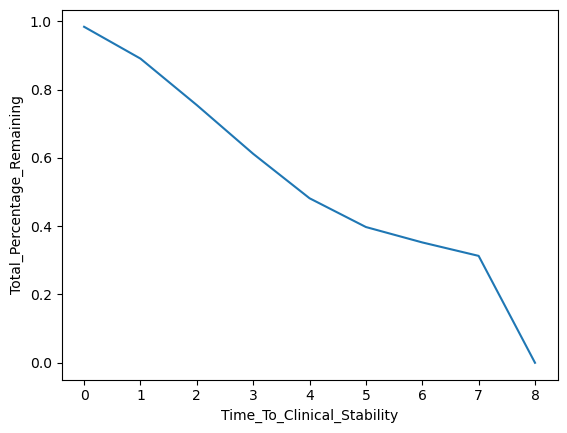

In [233]:
release_plot=seaborn.lineplot(data=tcs_count_data,x='Time_To_Clinical_Stability',y='Total_Percentage_Remaining')

In [234]:
figure=release_plot.get_figure()
figure.savefig("Release Plot.png")

Creation of the dataset which includes the lab data

In [30]:
phnumo_lab

,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_bands,lab_platelets,lab_inr,lab_na,lab_k,lab_bun,lab_creatinine,...,lab_bnp,lab_crp,lab_pct,lab_vitamind,lab_abg,lab_abgph,lab_abgpaco2,lab_abgpao2,lab_abgbicarb,lab_abgfio2
4550,30.00000,10.00000,4.000000,11.067586,101.000000,1.793778,129.000000,4.000000,43.000000,3.000000,...,2718.227623,74.322495,6.403778,34.64,1.000000,7.434434,26.600000,67.129942,18.600000,24.282844
4551,47.00000,16.00000,14.000000,11.067586,348.000000,1.793778,144.000000,4.000000,15.000000,1.000000,...,2718.227623,74.322495,6.403778,34.64,1.000000,7.434434,23.800000,67.129942,18.700000,24.282844
4552,34.00000,11.00000,14.000000,11.067586,596.000000,1.793778,136.000000,5.000000,18.000000,1.000000,...,2718.227623,74.322495,6.403778,34.64,1.000000,7.434434,37.500000,67.129942,22.800000,24.282844
4553,44.00000,15.00000,9.000000,11.067586,249.000000,1.793778,135.000000,4.000000,12.000000,1.000000,...,2718.227623,74.322495,6.403778,34.64,1.000000,7.434434,36.004267,67.129942,23.989403,24.282844
4554,34.00000,12.00000,24.000000,11.067586,251.000000,1.793778,130.000000,5.000000,24.000000,1.000000,...,2718.227623,74.322495,6.403778,34.64,1.000000,7.434434,36.004267,67.129942,23.989403,24.282844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,36.60000,11.90000,9.140000,0.000000,242.000000,1.793778,132.000000,4.400000,37.000000,0.500000,...,2718.227623,74.322495,6.403778,34.64,0.000000,7.434434,36.004267,67.129942,23.989403,24.282844
8226,31.10000,9.70000,5.400000,1.000000,142.000000,1.793778,141.000000,3.500000,7.000000,0.600000,...,418.000000,32.600000,6.403778,34.64,0.000000,7.434434,36.004267,67.129942,23.989403,24.282844
8227,39.60000,13.10000,4.900000,1.000000,132.000000,1.793778,139.000000,5.100000,17.000000,1.300000,...,2718.227623,29.800000,0.050000,34.64,0.000000,7.434434,36.004267,67.129942,23.989403,24.282844
8228,37.60917,12.59599,21.683247,11.067586,431.096488,1.793778,136.479347,4.014072,40.706309,1.523575,...,2718.227623,74.322495,6.403778,34.64,0.524617,7.434434,36.004267,67.129942,23.989403,24.282844


In [31]:
phnumo_data

,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,...,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,tcs_days,early_late
4550,59.000000,1.000000,193.000000,100.000000,102.000000,20.000000,142.000000,82.00000,37.200000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,1
4551,61.000000,1.000000,168.000000,43.000000,90.000000,36.000000,118.000000,74.00000,36.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4,0
4552,70.000000,1.000000,168.000000,83.000000,69.000000,16.000000,117.000000,42.00000,37.200000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1,0
4553,75.000000,1.000000,178.000000,97.000000,73.000000,20.000000,134.000000,34.00000,36.100000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1,0
4554,88.000000,1.000000,175.000000,81.000000,106.000000,22.000000,111.000000,48.00000,36.700000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,27.000000,1.000000,166.000000,64.000000,99.739806,23.670351,126.127884,72.10153,38.300000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2,0
8226,36.000000,0.000000,153.000000,72.000000,134.000000,30.000000,126.000000,87.00000,36.200000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
8227,59.000000,1.000000,170.000000,70.000000,77.000000,18.000000,130.000000,90.00000,36.000000,1.000000,...,0.000000,0.133555,0.183934,0.416805,0.102578,0.652847,0.004108,0.405531,0,0
8228,63.300844,0.573993,158.564888,72.399195,99.739806,23.670351,126.127884,72.10153,37.516339,0.158973,...,0.148169,0.133555,0.183934,0.416805,0.102578,0.652847,0.004108,0.405531,8,1
